## <font color=green> Praticando: Analisando o Dataset do Titanic

In [1]:
import pandas as pd
import numpy as np
import json
import re

In [2]:
%config Completer.use_jedi = False

### Carregando Dataset

In [3]:
df_titanic = pd.read_csv('datasets/titanic.csv')
df_titanic.shape

(1309, 12)

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Passengerid**: ID do passageiro do navio (código primário).
- **Survived**: Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
- **Pclass**: Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
- **Name**: Nome do passageiro
- **Sex**: Gênero do passageiro, sendo masculino e feminino.
- **Age**: Idade do passageiro na data da ocorrência do naufrágio.
- **SibSp**: Número de irmãos / cônjuges a bordo.
- **Parch**: Número de pais / filhos a bordo.
- **Ticket**: Código do ticket.
- **Fare**: Valor da passagem.
- **Cabin**: Código de identificação da Cabine.
- **Embarked**: Local onde o passageiro embarcou no navio.

### Verificando os tipos de dados contidos no Dataset

In [5]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.00,655.0000,982.0000,1309.0
Survived,1309.0,0.377387,0.484918,0.00,0.00,0.0000,1.0000,1.0
Pclass,1309.0,2.294882,0.837836,1.00,2.00,3.0000,3.0000,3.0
Age,1046.0,29.881138,14.413493,0.17,21.00,28.0000,39.0000,80.0
SibSp,1309.0,0.498854,1.041658,0.00,0.00,0.0000,1.0000,8.0
Parch,1309.0,0.385027,0.865560,0.00,0.00,0.0000,0.0000,9.0
Fare,1309.0,4425.079523,25407.652350,0.00,8.05,20.2125,57.9792,262375.0


- A variável idade tem como valor máximo 80. Contudo o 3º quartil mostra a idade de 39 anos, o que indica que há outliers
- Quanto a coluna Fare (valor da passagem), temos outliers distorcendo a distribuição dos valores desta variável, puxando a média para 4428.39 sendo que a mediana está em 20.08

### Explorando os dados categóricos e numéricos

In [7]:
cat_col = [var for var in df_titanic.columns if df_titanic[var].dtype == 'O']
df_titanic.loc[:,cat_col].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [8]:
num_col = [var for var in df_titanic.columns if df_titanic[var].dtype != 'O']
df_titanic.loc[:,num_col].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7925.0000
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


- 3 variáveis discretas: Pclass, SibSp e Parch
- 2 variáveis contínuas: Fare e Age
- 1 variável Id: PassengerId (chave primária).
- 1 binário: Survived (booleano).

- Percentual de dados faltantes na base de treino

In [9]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex            10.92
Age            20.09
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.46
Embarked        0.00
dtype: float64

- Podemos observar que há 3 colunas com dados faltantes: Sex, Age e Cabin

## Vamos explorar o dataset para analisar o que é possível fazer para preencher os dados faltantes

- Total de Passageiros

In [10]:
df_titanic.shape[0]

1309

- Total de Passageiros com todos os registros preenchidos (linhas)

In [11]:
df_titanic.dropna().shape[0]

232

- Percentual de dados com 100% do preenchimento dos dados

In [12]:
round(df_titanic.dropna().shape[0] / len(df_titanic)*100, 2)

17.72

- Selecionando os registros com dados ausentes para a coluna Pclass

In [13]:
df_titanic[df_titanic['Pclass'].isnull()].shape[0]

0

- Não temos nenhum registro faltante para a coluna Pclass

- É interessante conseguir extrair os títulos dos nomes para verificar se temos realmente correlação entre as variáveis

In [14]:
def extrai_titulo(df):
    df['Título'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())

extrai_titulo(df_titanic)

- Checando se a coluna Título foi criada corretamente

In [15]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


- Checando se há algum registro sem título

In [16]:
df_titanic[df_titanic['Título'].isnull()].shape[0]

0

mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
the countess      1
sir               1
dona              1
capt              1
don               1
jonkheer          1
mme               1
lady              1
Name: Título, dtype: int64

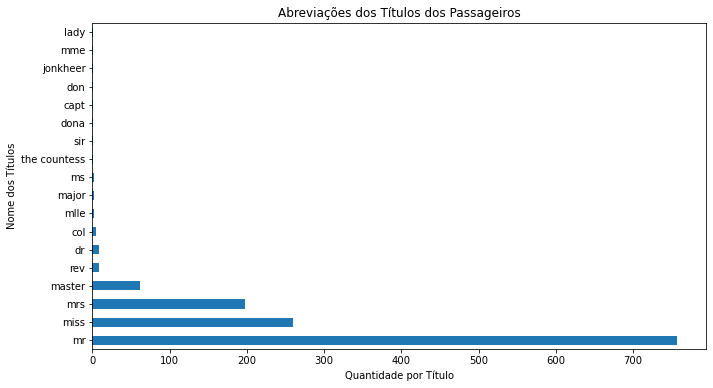

In [17]:
fig = df_titanic['Título'].value_counts().plot.barh(figsize=(11,6))
fig.set_title('Abreviações dos Títulos dos Passageiros')
fig.set_ylabel('Nome dos Títulos')
fig.set_xlabel('Quantidade por Título')

df_titanic['Título'].value_counts()

- Conforme o gráfico acima, temos vários títulos

- Vamos investigar os outliers como já identificamos acima nas variáveis Age e Fare. Para isso, vamos utilizar o boxplot.

<AxesSubplot:>

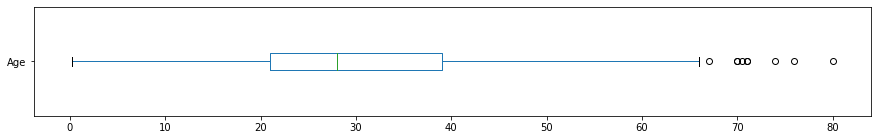

In [18]:
df_titanic['Age'].plot.box(vert=False, figsize=(15,2))

<AxesSubplot:>

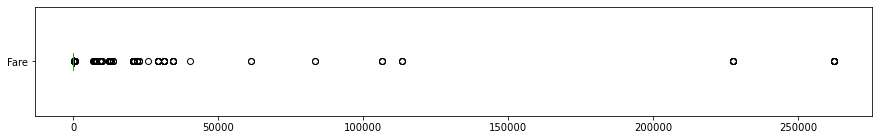

In [19]:
df_titanic['Fare'].plot.box(vert=False, figsize=(15,2))

- Como já esperado, diversos Outliers

- Para a coluna Fare, a quantidade de outiliers é tão grande que não conseguimos visualizar o box. Portanto, vamos filtrar por Fare menor que 500.

<AxesSubplot:>

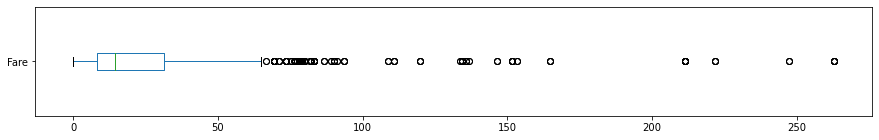

In [20]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].plot.box(vert=False, figsize=(15,2))

- Analisando a distribuição das variáveis para descobrir se elas são gaussianas (normais) ou distorcidas (assimétricas)

<AxesSubplot:>

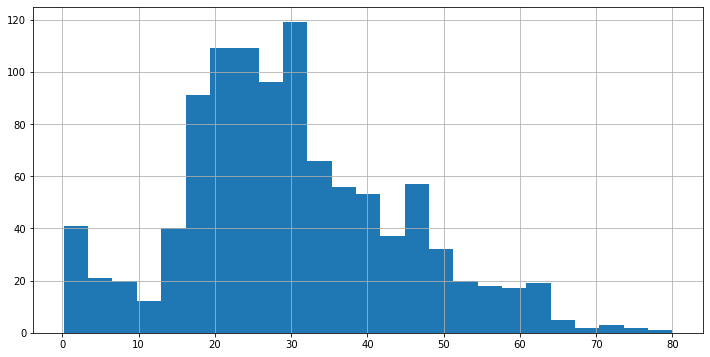

In [21]:
df_titanic['Age'].hist(bins = 25, figsize=(12,6))

<AxesSubplot:>

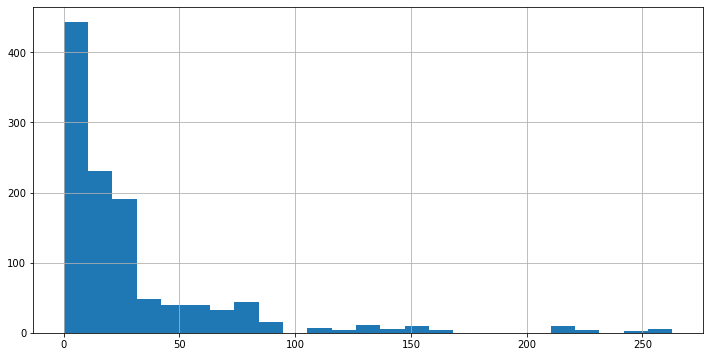

In [22]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].hist(bins = 25, figsize=(12,6))

- Vamos ver a distribuição de pessoas por tipo de classe de passagem

<AxesSubplot:>

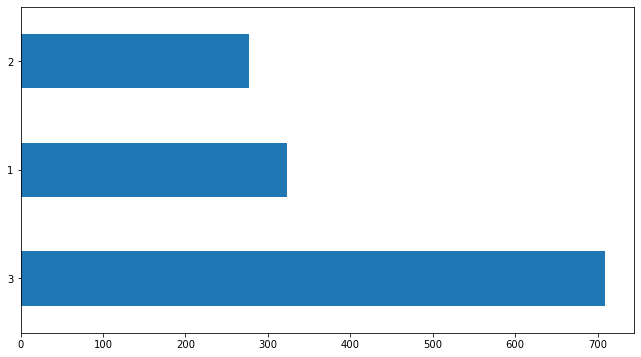

In [23]:
df_titanic['Pclass'].value_counts().plot.barh(figsize=(11,6))

- Vamos identificar qual o nosso *threshold* de valor da passagem pago apenas pelos passageiros da Primeira Classe

In [24]:
df_titanic.loc[df_titanic['Fare'] > 10000].groupby(['Pclass','Fare'])[['PassengerId']].count()

PassengerId
Pclass Fare                 
1      25925.0             1
       40125.0             1
       61175.0             2
       83475.0             2
       106425.0            3
       113275.0            3
       227525.0            5
       262375.0            7
2      12275.0             1
       12525.0             1
       12875.0             2
3      12475.0             4
       13775.0             3
       20525.0             3
       20575.0             4
       21075.0             5
       22025.0             3
       22525.0             3
       29125.0             6
       31275.0             7
       34375.0             5

- Podemos perceber que o valor mais alto pago na terceira classe foi de 34375. Ou seja, todo mundo que pagou um valor acima desse está na primeira classe.

- Vamos identificar agora a distribuição das classes das pessoas pelos seus títulos

In [25]:
df_titanic.groupby(['Título','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Título       Pclass                                                        
capt         1                 1         1     1    1    1      1      1   
col          1                 4         4     4    4    4      4      4   
don          1                 1         1     1    0    1      1      1   
dona         1                 1         1     1    1    1      1      1   
dr           1                 6         6     6    6    5      6      6   
             2                 2         2     2    1    2      2      2   
jonkheer     1                 1         1     1    1    1      1      1   
lady         1                 1         1     1    1    1      1      1   
major        1                 2         2     2    2    2      2      2   
master       1                 5         5     5    5    5      5      5   
             2                11        11    11   10   11     11     11   
             3                45        45    45   39   37     45     45   
miss         1                60        60    60   49   59     60     60   
             2                50        50    50   47   48     50     50   
             3               150       150   150  135  103    150    150   
mlle         1                 2         2     2    2    2      2      2   
mme          1                 1         1     1    1    1      1      1   
mr           1               159       159   159  139  132    159    159   
             2               150       150   150  130  137    150    150   
             3               448       448   448  411  312    448    448   
mrs          1                77        77    77   65   67     77     77   
             2                55        55    55   48   54     55     55   
             3                65        65    65   57   49     65     65   
ms           2                 1         1     1    1    1      1      1   
             3                 1         1     1    1    0      1      1   
rev          2                 8         8     8    7    8      8      8   
sir          1                 1         1     1    1    1      1      1   
the countess 1                 1         1     1    1    1      1      1   

                     Ticket  Fare  Cabin  Embarked  
Título       Pclass                                 
capt         1            1     1      1         1  
col          1            4     4      3         4  
don          1            1     1      0         1  
dona         1            1     1      1         1  
dr           1            6     6      4         6  
             2            2     2      0         2  
jonkheer     1            1     1      0         1  
lady         1            1     1      1         1  
major        1            2     2      2         2  
master       1            5     5      5         5  
             2           11    11      3        11  
             3           45    45      1        45  
miss         1           60    60     48        60  
             2           50    50      6        50  
             3          150   150      4       150  
mlle         1            2     2      2         2  
mme          1            1     1      1         1  
mr           1          159   159    120       159  
             2          150   150      7       150  
             3          448   448      8       448  
mrs          1           77    77     66        77  
             2           55    55      7        55  
             3           65    65      3        65  
ms           2            1     1      0         1  
             3            1     1      0         1  
rev          2            8     8      0         8  
sir          1            1     1      1         1  
the countess 1            1     1      1         1

- Todos que estão na terceira classe possuem o título de ms, mrs, mr e master. Todos os outros estão na segunda ou primeira classe.

In [26]:
df_titanic.loc[df_titanic['Fare'] > 50000]['Pclass'].value_counts()

1    22
Name: Pclass, dtype: int64

- Vamos encontrar a média de preço para os passageiros da primeira, segunda e terceira classe (exlcuindo os Outliers para não subir a média)

- 1ª classe

<AxesSubplot:>

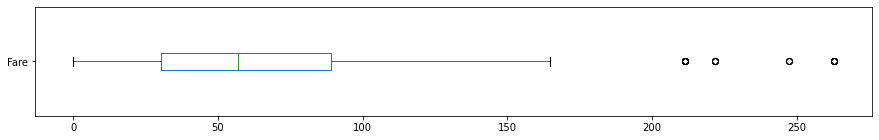

In [27]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 1)].plot.box(vert=False, figsize=(15,2))

In [28]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 200) & (df_titanic['Pclass'] == 1)].mean()

62.69911465201462

- 2ª classe

<AxesSubplot:>

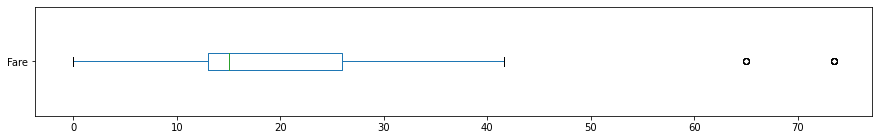

In [29]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 2)].plot.box(vert=False, figsize=(15,2))

In [30]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 60) & (df_titanic['Pclass'] == 2)].mean()

19.0673846743295

- 3ª classe

<AxesSubplot:>

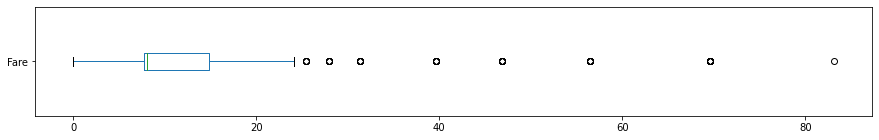

In [31]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 3)].plot.box(vert=False, figsize=(15,2))

In [32]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 30) & (df_titanic['Pclass'] == 3)].mean()

10.45326592178772

### Tratando dados ausentes da coluna Sex

- Como poderíamos fazer isso?

- Uma alternativa é identicar seu gênero de acordo com o título do passageiro

In [33]:
df_titanic['Título'].unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

- Verificando se há algum passageiro que não possui título

In [34]:
df_titanic[df_titanic['Título'].isnull()].shape[0]

0

- Listando títulos masculinos

In [35]:
list_male = ['mr', 'master', 'don', 'rev', 'dr', 'major', 'sir', 'col', 'capt', 'jonkheer']

- Filtrando resultado que não possuem definição na coluna Sex

In [36]:
df_aux = df_titanic[df_titanic['Sex'].isnull()]
df_aux

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
11,12,1,1,"Bonnell, Miss. Elizabeth",NaN,58.0,0,0,113783,26.5500,C103,S,miss
12,13,0,3,"Saundercock, Mr. William Henry",NaN,20.0,0,0,A/5. 2151,8.0500,NaN,S,mr
13,14,0,3,"Andersson, Mr. Anders Johan",NaN,39.0,1,5,347082,31275.0000,NaN,S,mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",NaN,14.0,0,0,350406,7.8542,NaN,S,miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",NaN,NaN,0,0,334915,7.7208,NaN,Q,miss
1300,1301,1,3,"Peacock, Miss. Treasteall",NaN,3.0,1,1,SOTON/O.Q. 3101315,13775.0000,NaN,S,miss
1301,1302,1,3,"Naughton, Miss. Hannah",NaN,NaN,0,0,365237,7.7500,NaN,Q,miss
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",NaN,37.0,1,0,19928,90.0000,C78,Q,mrs


- Atribuindo o gênero do passageiro de acordo com o seu título

In [37]:
df_aux['Sex'] = df_aux['Título'].apply(lambda x: 'male' if x in list_male else 'female')
df_aux

<ipython-input-37-60d78d20a5df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['Sex'] = df_aux['Título'].apply(lambda x: 'male' if x in list_male else 'female')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,miss
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31275.0000,NaN,S,mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,miss
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13775.0000,NaN,S,miss
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,miss
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,mrs


- Combinando os dois dataframes

In [38]:
df_titanic = df_titanic.combine_first(df_aux)

In [39]:
df_titanic[df_titanic['Sex'].isnull()].shape[0]

0

- Podemos observar que todos os passageiros possui o registro de gênero

### Tratando a coluna Age (Idade) para valores faltantes

In [40]:
df_titanic[df_titanic["Age"].isnull()].shape[0]

263

- Temos 263 passageiros sem idade

- Podemos inserir as faixas de idades conforme classe e gênero

In [41]:
df_titanic.groupby(['Pclass','Sex'])[['Age']].mean()

Age
Pclass Sex              
1.0    female  37.037594
       male    41.029272
2.0    female  27.499223
       male    30.815380
3.0    female  22.185329
       male    25.962264

- Ou podemos tratar a idade por classe e título. Irá dar mais trabalho, mas ficará mais próximo da realidade.

In [42]:
df_aux = df_titanic.groupby(['Pclass','Título'], as_index=False)[['Age']].mean()
df_aux

,Pclass,Título,Age
0,1.0,capt,70.000000
1,1.0,col,54.000000
2,1.0,don,40.000000
3,1.0,dona,39.000000
4,1.0,dr,45.600000
5,1.0,jonkheer,38.000000
6,1.0,lady,48.000000
7,1.0,major,48.500000
8,1.0,master,6.984000
9,1.0,miss,30.338983


- Como pode ser visto, apena ms da terceira classe não possui idade. Vamos assumir então para essa situação o valor de ms da segunda classe.

In [43]:
df_aux['Age'].loc[27] = df_aux['Age'].loc[21]
df_aux

/home/andre/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Pclass,Título,Age
0,1.0,capt,70.000000
1,1.0,col,54.000000
2,1.0,don,40.000000
3,1.0,dona,39.000000
4,1.0,dr,45.600000
5,1.0,jonkheer,38.000000
6,1.0,lady,48.000000
7,1.0,major,48.500000
8,1.0,master,6.984000
9,1.0,miss,30.338983


In [44]:
df_titanic[df_titanic['Age'].isnull()].shape[0]

263

- Podemos ver que há 263 registros sem Age

- Vamos utilizar uma função que retorna a média de idade baseada na média de idade de classe e título.

In [45]:
def impute_age(age_pclass_titulo):
    age = age_pclass_titulo[0]
    pclass = age_pclass_titulo[1]
    titulo = age_pclass_titulo[2]
    if pd.isnull(age):
        return df_aux['Age'].loc[(df_aux['Pclass']==pclass) & (df_aux['Título']==titulo)].values[0]
    else:
        return age

In [46]:
df_titanic['Age'] = df_titanic[['Age','Pclass','Título']].apply(impute_age, axis = 1)

In [47]:
df_titanic[df_titanic['Age'].isnull()].shape[0]

0

### Tratando a coluna Cabin

- Agora só temos a coluna Cabin com dados faltantes que possui ~33% dos dados

In [48]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.46
Embarked        0.00
Título          0.00
dtype: float64

In [49]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.0,0.0,A/5 21171,7.2500,NaN,S,mr
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1.0,0.0,PC 17599,71.2833,C85,C,mrs
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.0,0.0,STON/O2. 3101282,7925.0000,NaN,S,miss
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1.0,0.0,113803,53.1000,C123,S,mrs
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.0,0.0,373450,8.0500,NaN,S,mr
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.31891,0.0,0.0,330877,8.4583,NaN,Q,mr
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00000,0.0,0.0,17463,51.8625,E46,S,mr
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00000,3.0,1.0,349909,21075.0000,NaN,S,master
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0.0,2.0,347742,11.1333,NaN,S,mrs
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1.0,0.0,237736,30.0708,NaN,C,mrs


- Vamos verificar como estão distribuídas as cabines por classe, selecionando apenas a letra inicial de cada observação

In [50]:
df_titanic['Ale_cabin'] = df_titanic['Cabin'].str[0].str.lower().str.strip()

In [51]:
df_titanic.groupby('Pclass')['Ale_cabin'].value_counts()

Pclass  Ale_cabin
1.0     c            94
        b            65
        d            40
        e            34
        a            22
        t             1
2.0     f            13
        d             6
        e             4
3.0     f             8
        g             5
        e             3
Name: Ale_cabin, dtype: int64

- Temos a seguinte distribuição das cabines por classe:
    - Classe 1 = a, b, c, d, e, t
    - Classe 2 = d, e, f
    - Classe 3 = e, g, f

- Podemos remover a coluna Ale_cabin pois ja extraimos o que precisamos

In [52]:
del df_titanic['Ale_cabin']

- Vamos criar um dicionário onde a chave é a classe e os valores são as possíveis letras das cabines

In [53]:
dict_classe = {1:['a', 'b', 'c', 'd', 'e', 't'],
               2:['d', 'e', 'f'],
               3:['e', 'g', 'h']}

- Filtrando registros de Cabin nula

In [54]:
df_aux = df_titanic[df_titanic['Cabin'].isnull()]
df_aux

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.0,0.0,A/5 21171,7.2500,NaN,S,mr
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.0,0.0,STON/O2. 3101282,7925.0000,NaN,S,miss
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.0,0.0,373450,8.0500,NaN,S,mr
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.31891,0.0,0.0,330877,8.4583,NaN,Q,mr
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00000,3.0,1.0,349909,21075.0000,NaN,S,master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304.0,1.0,3.0,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0.0,0.0,347086,7775.0000,NaN,S,miss
1304,1305.0,0.0,3.0,"Spector, Mr. Woolf",male,28.31891,0.0,0.0,A.5. 3236,8.0500,NaN,S,mr
1306,1307.0,0.0,3.0,"Saether, Mr. Simon Sivertsen",male,38.50000,0.0,0.0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr
1307,1308.0,0.0,3.0,"Ware, Mr. Frederick",male,28.31891,0.0,0.0,359309,8.0500,NaN,S,mr


- Vamos imputar os dados com a função choice do numpy

In [55]:
df_aux['Cabin'] = df_titanic['Pclass'].apply(lambda x: np.random.choice(dict_classe[x], size=1)[0])

<ipython-input-55-d900d826106b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['Cabin'] = df_titanic['Pclass'].apply(lambda x: np.random.choice(dict_classe[x], size=1)[0])


In [56]:
df_aux.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.0,0.0,A/5 21171,7.2500,e,S,mr
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.0,0.0,STON/O2. 3101282,7925.0000,g,S,miss
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.0,0.0,373450,8.0500,h,S,mr
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.31891,0.0,0.0,330877,8.4583,e,Q,mr
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00000,3.0,1.0,349909,21075.0000,g,S,master


- Combinando os dois dataframes

In [57]:
df_titanic = df_titanic.combine_first(df_aux)

In [58]:
df_titanic[df_titanic['Cabin'].isnull()].shape[0]

0

- Podemos observar que todos os registros de Cabin possuem pelo menos um letra associada

In [59]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Título         0.0
dtype: float64

- E com isso, finalizamos nossa atividade de limpeza dos dados. Todas as colunas possuem dados.

- Vamos explorar visualmente nossos dados. Vamos visualizar as pessoas que sobreviveram baseado na classe e gênero

- Pessoas que sobreviveram

<AxesSubplot:xlabel='Pclass'>

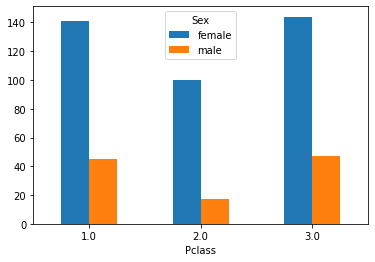

In [60]:
survived = df_titanic.loc[df_titanic['Survived'] == 1]
percentual = pd.crosstab(survived.Sex,
                         survived.Pclass,
                         aggfunc = 'count',
                         values = survived.Survived)

percentual.T.plot.bar(rot=0)

- Pessoas que não sobreviveram

<AxesSubplot:xlabel='Pclass'>

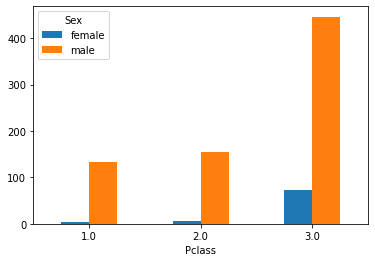

In [61]:
not_survived = df_titanic.loc[df_titanic['Survived'] == 0]
percentual = pd.crosstab(not_survived.Sex,
                         not_survived.Pclass,
                         aggfunc = 'count',
                         values = not_survived.Survived)

percentual.T.plot.bar(rot=0)

- Conforme nosso gráfico acima, em todas as classes o percentual de mulheres sobrevivente é superior aos homens e fica mais expressivo quando olhamos para a primeria e segunda classe.


- Média de idade dos que sobreviveram e dos que morreram

In [62]:
df_titanic.groupby('Survived')[['Age']].mean()

,Age
Survived,
0.0,30.103622
1.0,28.552944
